<a href="https://colab.research.google.com/github/RitaDCassia/CNN/blob/main/adaptacao_e_comentarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# importacoes nescessárias
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [23]:
!cat perceptron.py

cat: perceptron.py: No such file or directory


   !cat perceptron.py

In [31]:
%%writefile perceptron.py
import numpy as np

class Perceptron(object):
    """
    Classificador Perceptron.

    Parâmetros
    ------------
    eta : float
      Taxa de aprendizagem (entre 0.0 e 1.0)
    n_iter : int
      Número de épocas (passagens sobre o conjunto de dados de treinamento)
    random_state : int
      Semente para o gerador de números aleatórios para a inicialização dos pesos

    Atributos
    -----------
    w_ : array unidimensional
      Pesos após o treinamento (incluso o termo de bias na posição 0)
    errors_ : list
      Número de atualizações (erros) em cada época
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta                  # Define a taxa de aprendizagem
        self.n_iter = n_iter            # Define o número de épocas que serão executadas
        self.random_state = random_state  # Define a semente para randomização

    def fit(self, X, y):
        """
        Treina o modelo utilizando os dados fornecidos.

        Parâmetros
        ----------
        X : array-like, forma = [n_amostras, n_features]
            Conjunto de dados de treinamento.
        y : array-like, forma = [n_amostras]
            Vetor com os rótulos das classes (-1 ou 1).

        Retorna
        -------
        self : objeto
            Retorna a instância atual do classificador.
        """
        # Inicializa o gerador de números aleatórios com a semente fornecida
        rgen = np.random.RandomState(self.random_state)

        # Inicializa os pesos com uma distribuição normal pequena
        # O tamanho do vetor de pesos é 1 (termo de bias) + número de features
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])

        # Lista para armazenar o número de erros (atualizações) por época
        self.errors_ = []

        # Loop de treinamento (épocas)
        for _ in range(self.n_iter):
            errors = 0  # Reseta o contador de erros para a época atual

            # Itera sobre cada amostra e rótulo
            for xi, target in zip(X, y):
                # Calcula a atualização: taxa de aprendizagem * (valor real - predição)
                update = self.eta * (target - self.predict(xi))

                # Atualiza os pesos (exceto o bias)
                self.w_[1:] += update * xi

                # Atualiza o bias (termo w_[0])
                self.w_[0] += update

                # Se a atualização for diferente de zero, significa que houve erro.
                errors += int(update != 0.0)

            # Armazena o número total de erros desta época
            self.errors_.append(errors)

        return self

    def net_input(self, X):
        """
        Calcula a entrada líquida (soma ponderada + bias).

        Parâmetros
        ----------
        X : array-like
            Conjunto de dados (pode ser uma amostra ou conjunto de amostras).

        Retorna
        -------
        float ou array
            Valor resultante da soma ponderada das entradas com o termo de bias.
        """
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """
        Retorna o rótulo da classe após aplicar a função degrau unitário.

        Parâmetros
        ----------
        X : array-like
            Conjunto de dados (pode ser uma amostra ou conjunto de amostras).

        Retorna
        -------
        int ou array de ints
            Rótulo da classe: 1 se a entrada líquida >= 0.0, caso contrário -1.
        """
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Overwriting perceptron.py


Adapte o código anterior para ser executado para os dados sintéticos.
# adaptacao atividade


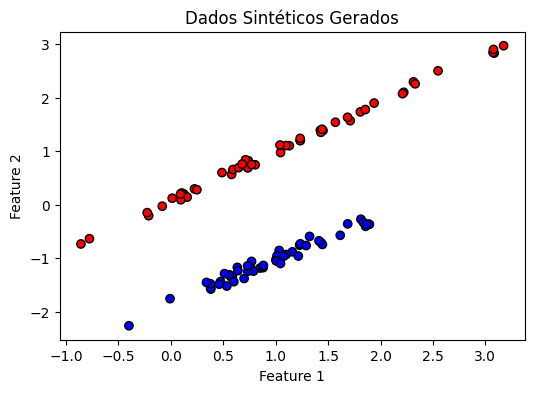

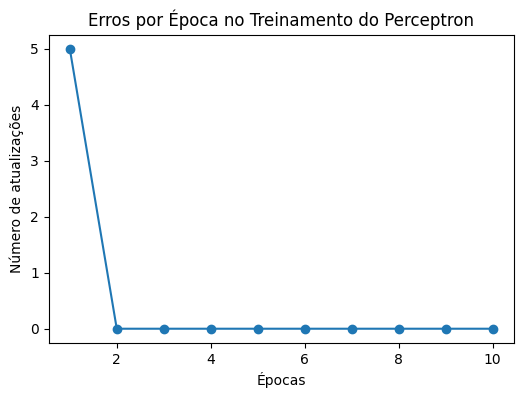

<ipython-input-34-8891aa348731>:48: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


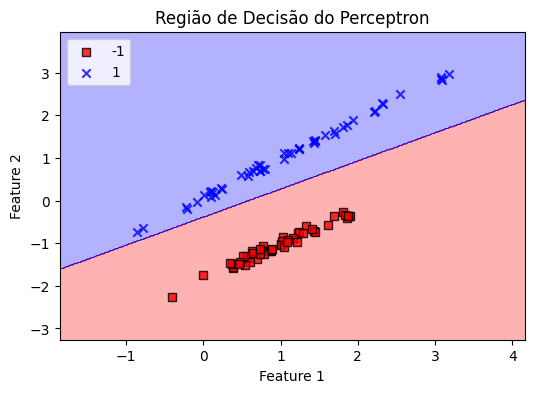

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from matplotlib.colors import ListedColormap

# Importa a classe Perceptron definida no módulo perceptron
from perceptron import Perceptron

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plota as regiões de decisão do classificador.

    Parâmetros
    ----------
    X : array-like, forma = [n_amostras, 2]
        Conjunto de dados utilizado para plotar as bordas.
    y : array-like, forma = [n_amostras]
        Vetor com os rótulos das classes.
    classifier : objeto
        Classificador treinado que possui o método predict.
    resolution : float, opcional (default=0.02)
        Resolução da malha para plotagem.
    """
    # Define os marcadores e a paleta de cores
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Define os limites do gráfico
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Cria a malha de pontos
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Calcula as predições para cada ponto da malha
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)

    # Plota a superfície de decisão
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plota as amostras reais
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')

def main():
    # Geração dos dados sintéticos com 100 amostras, 2 features e 2 classes
    X, y = make_classification(n_samples=100, n_features=2, n_classes=2,
                               n_clusters_per_class=1, n_redundant=0, random_state=42)

    # Exibe os dados em um gráfico de dispersão
    plt.figure(figsize=(6,4))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k')
    plt.title('Dados Sintéticos Gerados')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    # Como o Perceptron foi implementado para usar rótulos -1 e 1,
    # convertemos os rótulos: onde y == 0 passamos a -1.
    y = np.where(y == 0, -1, 1)

    # Cria a instância do Perceptron com taxa de aprendizagem e número de épocas definidos
    ppn = Perceptron(eta=0.1, n_iter=10, random_state=42)

    # Treina o Perceptron com os dados sintéticos
    ppn.fit(X, y)

    # Plota o número de atualizações (erros) por época
    plt.figure(figsize=(6,4))
    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
    plt.xlabel('Épocas')
    plt.ylabel('Número de atualizações')
    plt.title('Erros por Época no Treinamento do Perceptron')
    plt.show()

    # Plota as regiões de decisão junto com os dados
    plt.figure(figsize=(6,4))
    plot_decision_regions(X, y, classifier=ppn)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Região de Decisão do Perceptron')
    plt.legend(loc='upper left')
    plt.show()

if __name__ == '__main__':
    main()

# Codigo google colab sem alteracoes comentado

In [35]:
# Define o vetor v1
v1 = np.array([1, 2, 3])
# Define o vetor v2 como 0.5 vezes v1
v2 = 0.5 * v1
# Calcula o ângulo em radianos entre v1 e v2 usando a relação:
# cos(θ) = (v1 · v2) / (||v1|| * ||v2||)
angulo = np.arccos(v1.dot(v2) / (np.linalg.norm(v1) * np.linalg.norm(v2)))

# Exibe o ângulo calculado
print(angulo)

0.0


In [36]:
# Define a URL do dataset Iris
s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

# Lê o dataset a partir da URL, sem cabeçalho e com encoding 'utf-8'
df = pd.read_csv(s, header=None, encoding='utf-8')

# Exibe as últimas linhas do DataFrame
df.tail()

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [37]:
# Lê o dataset a partir do arquivo local 'iris.data' (nao tenho o arquivo)
df = pd.read_csv('iris.data', header=None, encoding='utf-8')

# Exibe as últimas 5 linhas do DataFrame
df.tail()

FileNotFoundError: [Errno 2] No such file or directory: 'iris.data'

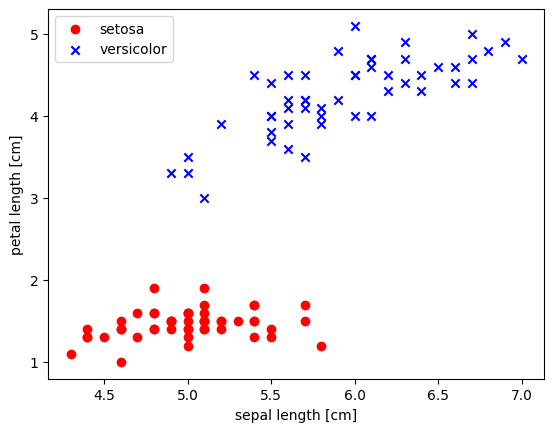

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Seleciona as classes setosa e versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extrai o comprimento da sépala e o comprimento da pétala
X = df.iloc[0:100, [0, 2]].values

# Plota os dados
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')

plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')

# plt.savefig('images/02_06.png', dpi=300)
plt.show()

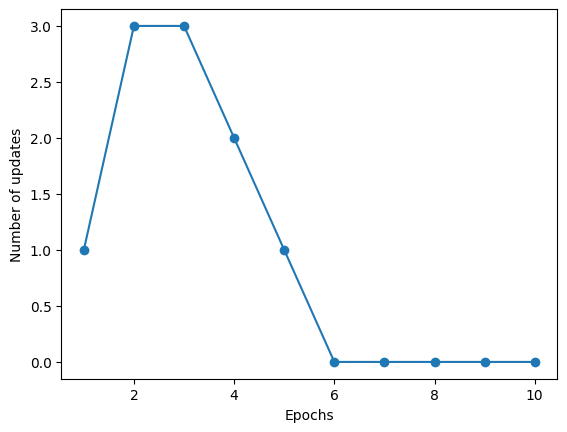

In [40]:
ppn = Perceptron(eta=0.1, n_iter=10)

# Treina o Perceptron com os dados (X, y)
ppn.fit(X, y)

# Plota o número de atualizações (erros) por época
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

In [44]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    """
    Plota as regiões de decisão do classificador e os exemplos dos dados.

    Parâmetros:
    -----------
    X : array-like, shape = [n_amostras, 2]
        Conjunto de dados de entrada contendo duas features.
    y : array-like, shape = [n_amostras]
        Vetor de rótulos ou classes dos dados.
    classifier : objeto
        Classificador que implementa o método predict.
    resolution : float, opcional (default=0.02)
        Resolução da malha para a visualização da superfície de decisão.
    """
    # Define os tipos de marcadores para os pontos e a paleta de cores.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    # Cria um colormap limitado ao número de classes presentes em y.
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Determina os limites mínimos e máximos da primeira feature (coluna 0)
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    # Determina os limites mínimos e máximos da segunda feature (coluna 1)
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    # Cria uma malha de pontos que cobre o espaço dos dados
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))

    # Prepara os dados da malha para predição:
    # Converte xx1 e xx2 em um array 2D onde cada linha é uma combinação (xx1, xx2)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    # Redimensiona Z para a forma original da malha (xx1) usada na plotagem
    Z = Z.reshape(xx1.shape)

    # Plota a superfície de decisão (região onde o classificador separa as classes)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    # Define os limites do gráfico nos eixos x e y
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plota os pontos reais dos dados sobre a superfície de decisão
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,       # Define a transparência dos pontos
                    c=colors[idx],   # Cor atribuída à classe atual
                    marker=markers[idx],  # Marcador atribuído à classe atual
                    label=cl,        # Rótulo para a legenda
                    edgecolor='black')  # Contorno preto para os pontos

<ipython-input-44-a1ae3a281ce4>:46: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


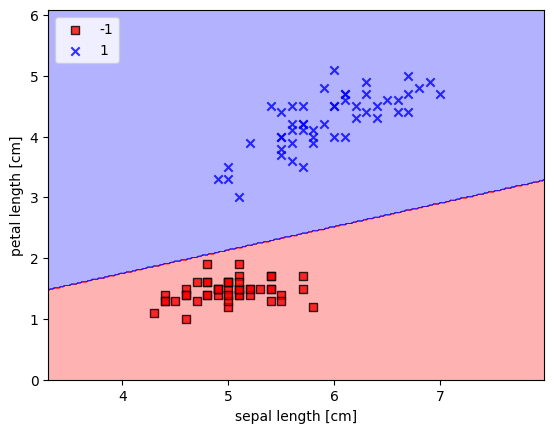

In [45]:
# Plota as regiões de decisão do classificador utilizando a função definida previamente.
plot_decision_regions(X, y, classifier=ppn)

# Define o rótulo do eixo x com a informação do comprimento da sépala.
plt.xlabel('sepal length [cm]')

# Define o rótulo do eixo y com a informação do comprimento da pétala.
plt.ylabel('petal length [cm]')

# Exibe a legenda no canto superior esquerdo do gráfico.
plt.legend(loc='upper left')

# Opcional: salva a figura gerada em um arquivo PNG com resolução de 300 dpi.
# plt.savefig('images/02_08.png', dpi=300)

# Exibe o gráfico na tela.
plt.show()